# SI 618 Homework 8

### The total points for this assignment is 100

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(10, 10)})

## The data:

* https://www.kaggle.com/terminus7/pokemon-challenge

> This data set contains two files.
> 
> pokemon.csv: 800 Pokemon, including their number, name, first and second type, basic stats: HP, Attack, Defense, Special Attack, Special Defense, the game generation they were introduced in, and whether they had the "legendary" status.
> 
> combats.csv: 50,000 simulated encounters between pairs of pokemon with the first pokemon to act, the other pokemon and the winner 

## Guidance

- Show your code
- <b>Explain your answer

In [2]:
pokemons = pd.read_csv("pokemon.csv")
pokemons["Overall"] = pokemons["HP"] + pokemons["Attack"] + pokemons["Defense"] + pokemons["Sp. Atk"] + pokemons["Sp. Def"] + pokemons["Speed"]
pokemons

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Overall
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,318
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,405
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,525
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,625
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,309
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True,600
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True,700
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True,600
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True,680


### Q1. For 15 Points: Plot the pairs of different ability points (HP, Attack, Sp. Attack, Defense, etc.). 

* Which abilities are most and least correlated?

               HP    Attack   Defense   Sp. Atk   Sp. Def     Speed
HP       1.000000  0.422386  0.239622  0.362380  0.378718  0.175952
Attack   0.422386  1.000000  0.438687  0.396362  0.263990  0.381240
Defense  0.239622  0.438687  1.000000  0.223549  0.510747  0.015227
Sp. Atk  0.362380  0.396362  0.223549  1.000000  0.506121  0.473018
Sp. Def  0.378718  0.263990  0.510747  0.506121  1.000000  0.259133
Speed    0.175952  0.381240  0.015227  0.473018  0.259133  1.000000


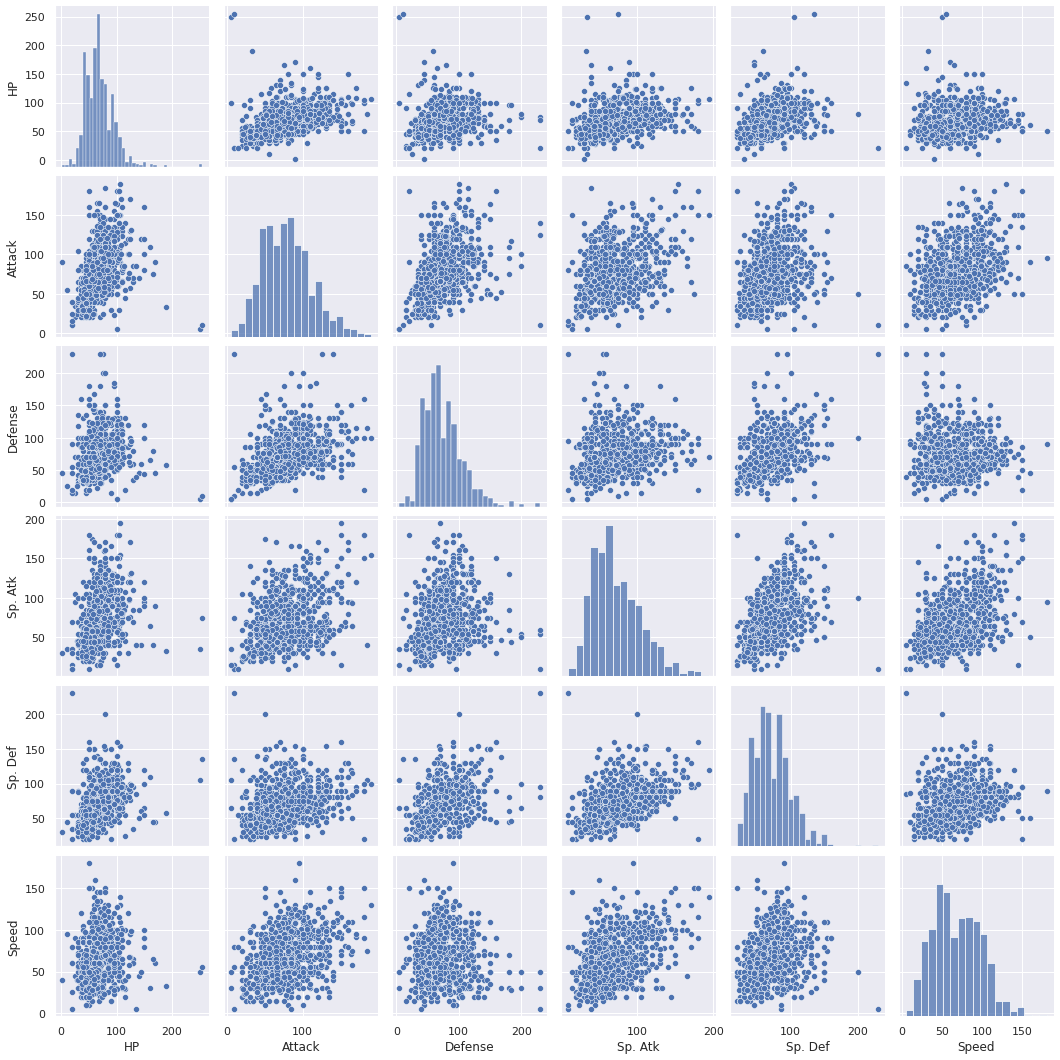

In [3]:
print(pokemons[["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]].corr(method="pearson"))
sns.pairplot(pokemons, vars=["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"])

The Sp.Def and Defense are most correlated, and the Defense and Speed are least correlated

###  Q2. For 15 Points: Plot the distribution of ability points per Pokémon type 

* How would you describe each Pokémon type with different ability points as well as their overall ability score (sum of different abilities)? For simplicity, let's focus solely on pokemon that are type 1 (non-dual type pokemon)

/home/panda/anaconda3/envs/SI618/lib/python3.8/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


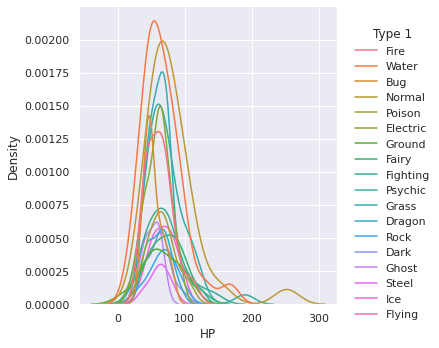

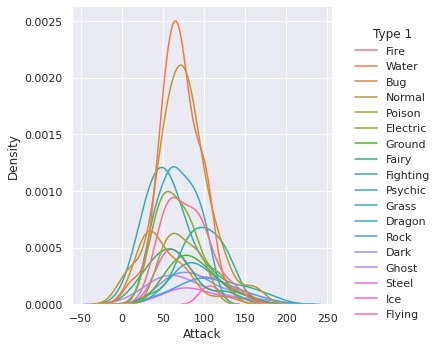

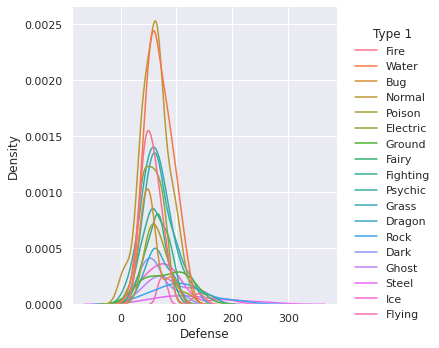

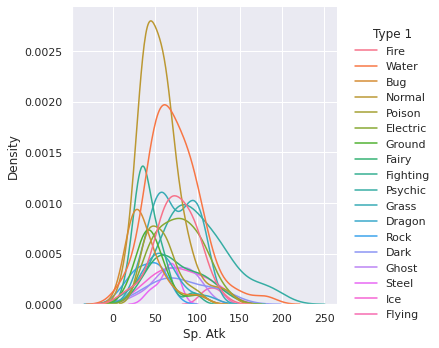

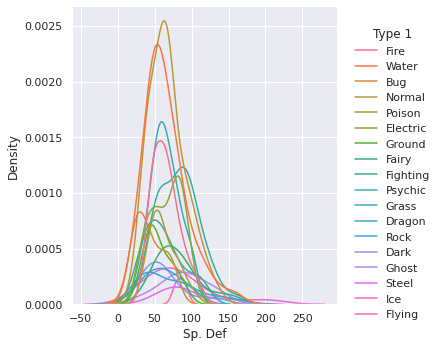

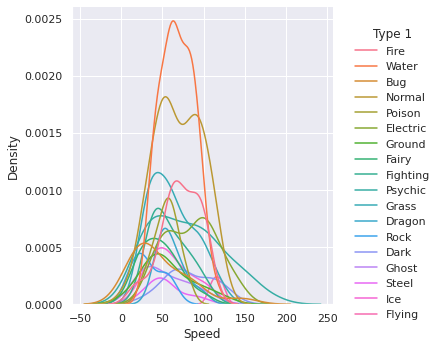

/home/panda/anaconda3/envs/SI618/lib/python3.8/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


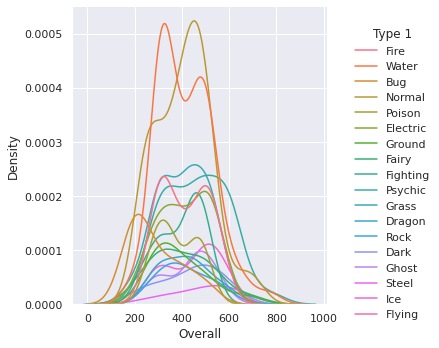

In [4]:
df = pokemons[pokemons["Type 2"].isna()]
# sns.pairplot(df, vars=["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed", "Overall"], hue="Type 1")
for x in ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed", "Overall"]:
    sns.displot(data=df, x=x, hue="Type 1", kind="kde")
    plt.show()

### Q3. For 15 Points: Explore how the Pokémon in each generation differ from each other?

* Do you think designers of *Pokémon* tried to address different distributions of ability points in each generation?
* Plot the distributions of abilities in different generations. Compare the results and explain your findings in 4-5 sentences.

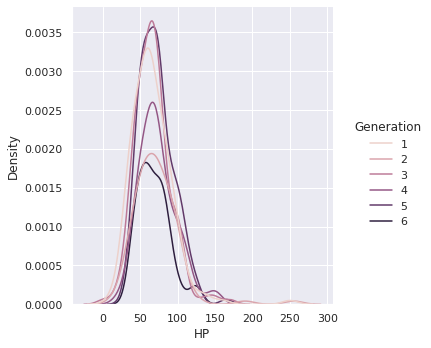

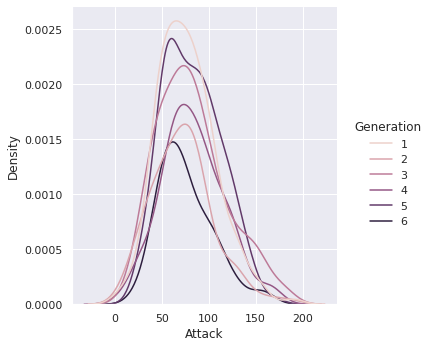

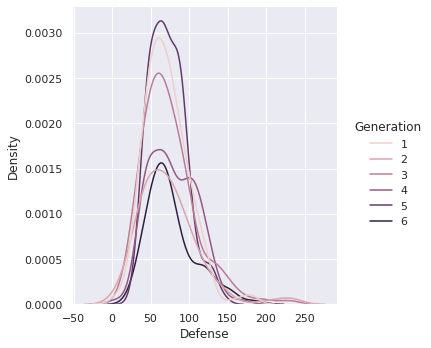

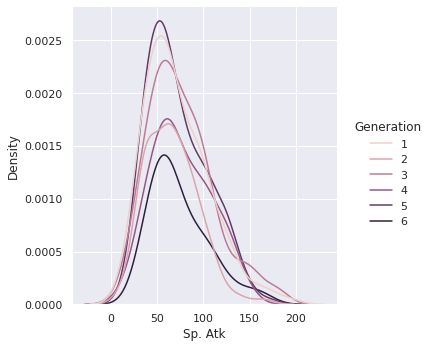

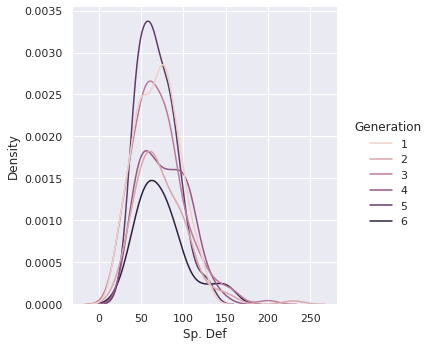

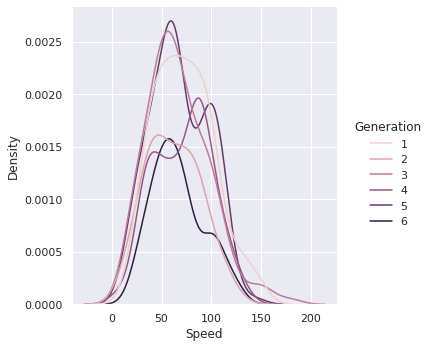

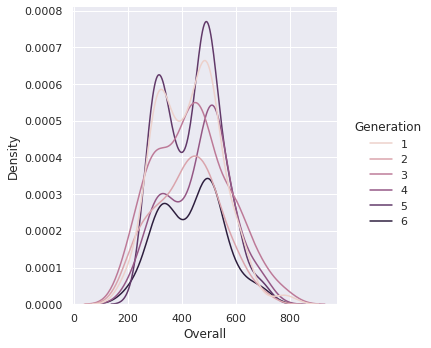

In [5]:
for x in ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed", "Overall"]:
    sns.displot(data=pokemons, x=x, hue="Generation", kind="kde")
    plt.show()

For all generations, they typically share a similar distribution with different parameters in all abilities. It seems the first and fifth generation are distibuted most concentratedly, while the sixed generation are distributed more evenly in all abilities. The ablities that differ most among the generations are Speed and Overall. For the Speed, the forth and fifth generations have a another peak of densitiy close to 90 except the highest one near 50. For overall, almost all generations have two peaks of density. The lower peak is near 300 while the higher is around 500. Typically, the one around 500 is higher than another, which means most pokemons have overall abilities near 500 whatever the generation the have. The two peaks may be caused by the addition of other abilities.

### Q4. For 15 points: Compare the distribution of the overall ability score of regular pokemon and legendary pokemon over  different generations using a suitable figure (Hint: We used this type of figure in the lab)

* What can you say about the odds of winning in an encounter between a regular pokemon and a legendary pokemon in general?
* Is there a trend in this relationship over generations?

<AxesSubplot:xlabel='Generation', ylabel='Overall'>

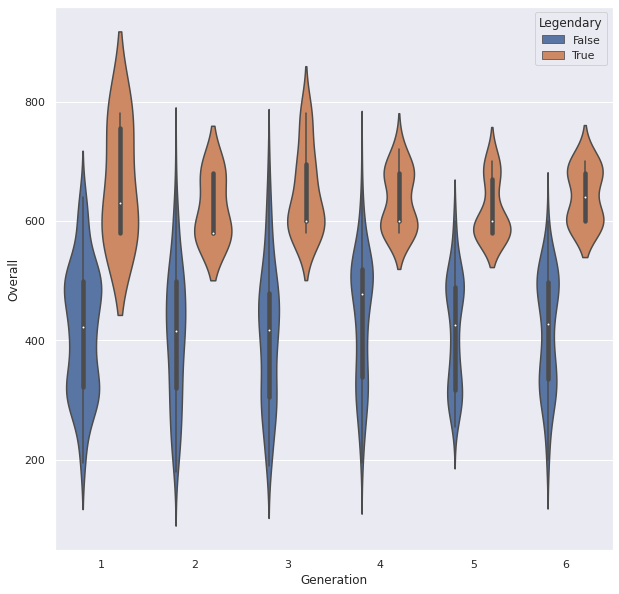

In [6]:
sns.violinplot(x="Generation", y="Overall", data=pokemons, hue="Legendary")

The odds for a regular pokemon to win a combat against a legendary pokemon is small, and there is no obvious pattern between different generations.

### Q5. For 10 points: Let's explore whether the designers prefer certain types of pokemon when assigning legendary status using the tools you've learnt for categorical variable relationships. Analyse Type 1 and Type 2 separately w.r.t legendary status. What are your observations?

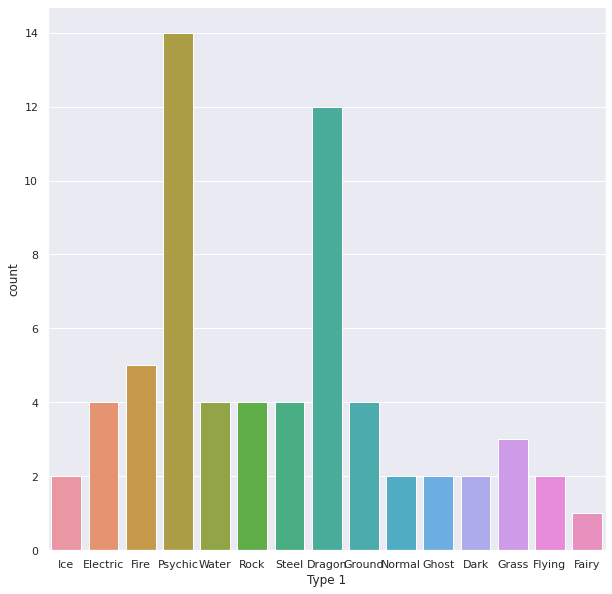

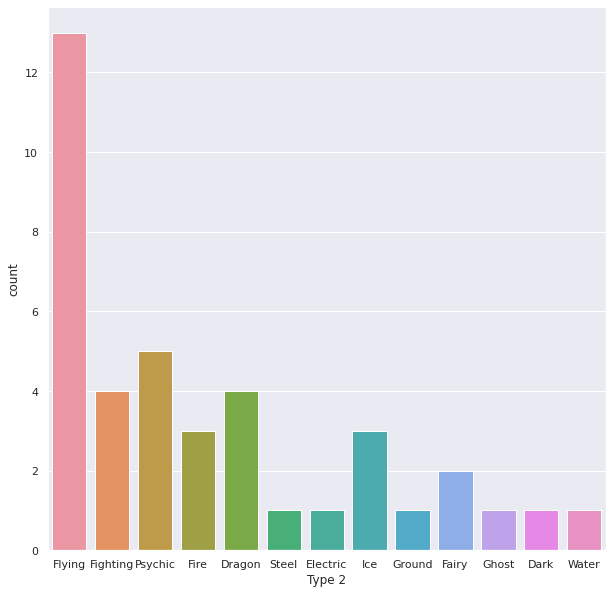

In [7]:
df_1 = pokemons[pokemons["Legendary"]]
c1 = sns.countplot(data=df_1, x="Type 1")
plt.show()
df_1 = pokemons[pokemons["Legendary"] & ~pokemons["Type 2"].isna()]
c2 = sns.countplot(data=df_1, x="Type 2")
plt.show()

For type1, the designers like Dragon and Psychic, and they like Dragon most.
For type2, the designers are very partial to the Flying.

### Q6. For 30 points: Let's try to more concretly analyse if the odds of a legendary pokemon winning was related to the generation they were introduced in. Load the combat encounter dataset and join it with the pokemon dataset to identify the generation and legendary status of each pokemon in an encounter. Considering encounters between legendary pokemon introduced in a given generation and regular pokemon of any generation, create a cross tabulation of generation against the wins/losses of legendary pokemon.
* Are there * statistically significant* differences in the odds of a legendary pokemon winning based on the generation it was introduced in? ($\alpha=0.05$). What do you observe?
* Does this remain true if we limit the encounters to pokemon introduced in the same generation?

In [8]:
from scipy.stats import chi2_contingency

combats = pd.read_csv("combats.csv")
df = combats.merge(
    pokemons[pokemons["Legendary"]][["Generation", "Overall"]], 
    how="left", 
    left_on="First_pokemon", 
    right_on="Overall"
).merge(
    pokemons[~pokemons["Legendary"]][["Overall"]], 
    how="left", 
    left_on="Second_pokemon", 
    right_on="Overall"
).dropna()
df["win"] = df["Winner"] == df["First_pokemon"]
cross = pd.crosstab(df.win, df.Generation)
chi2, p, dof, ex = chi2_contingency(cross)
print("p={}".format(p))

p=0.005682222831433029


In [9]:
df = combats.merge(
    pokemons[pokemons["Legendary"]][["Generation", "Overall"]], 
    how="left", 
    left_on="First_pokemon", 
    right_on="Overall"
).rename(columns={"Generation": "First_Generation"}).merge(
    pokemons[~pokemons["Legendary"]][["Overall", "Generation"]], 
    how="left", 
    left_on="Second_pokemon", 
    right_on="Overall"
).dropna()
df = df[df["First_Generation"]==df["Generation"]]
df["win"] = df["Winner"] == df["First_pokemon"]
cross = pd.crosstab(df.win, df.Generation)
chi2, p, dof, ex = chi2_contingency(cross)
print("p={}".format(p))

p=1.0740193886989393e-08


Since the p is smaller than 0.05, there is a statistically significant difference in the odds, and it remains when the encounters happens only between pokemons introduced in the same generation 

### Q7. (Ungraded) Let's explore if certain types of Pokemon have a competitive advantage against other types. To simplify the analysis let restrict the Pokemon with only one type (Type 1 and Type 2 are the same). Join the combat encounters data with the filtered Pokemon table to identify Type 1 of each combatant and estimate the win/loss rate of each pair of types (Consider only encounters between different types). In order to account for all encounters between the same two type pairs under one group, order the pairs by alphabetical order (i.e. first type precedes the second type in terms of alphabetical order of type name). Which types of pokemon are effective against most other types of pokemon? (Try to account for amount of data available when interpreting)

<AxesSubplot:xlabel='Second_type', ylabel='First_type'>

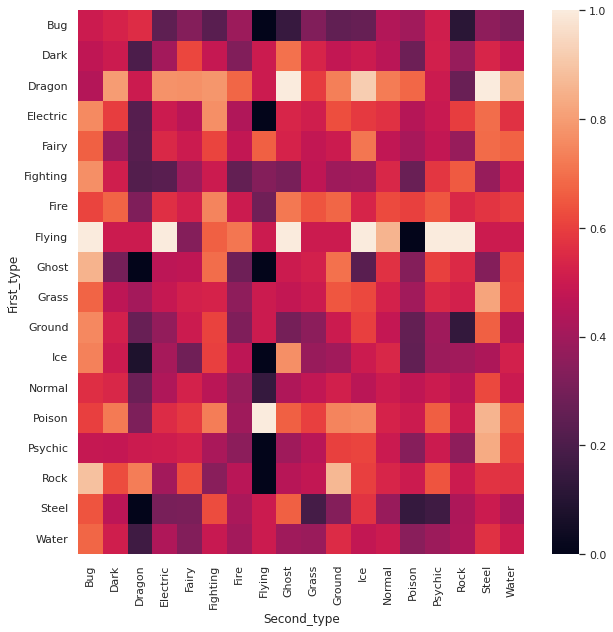

In [10]:
df = pokemons[pokemons["Type 2"].isna()][["Overall", "Type 1"]].dropna()
df = combats.merge(
    df, how="left", left_on="First_pokemon", right_on="Overall"
).merge(
    df, how="left", left_on="Second_pokemon", right_on="Overall"
).rename(
    columns={"Type 1_x": "First_type", "Type 1_y": "Second_type"}
).dropna().sort_values(["First_type", "Second_type"])
df["win"] = df["Winner"] == df["First_pokemon"]
df1 = df[df["win"]][["First_type", "Second_type"]]
df2 = df[~df["win"]].rename(columns={"First_type":"Second_type", "Second_type": "First_type"})[["First_type", "Second_type"]]
# The First type is always the winner
df = pd.concat([df1, df2])
type_combat= pd.crosstab(df.First_type, df.Second_type)
combat_df = type_combat + type_combat.T
df = (type_combat / (combat_df)).fillna(0.5).round(3)
sns.heatmap(df)

### The winner rate of combats between different types 
| First_type   |   Bug |   Dark |   Dragon |   Electric |   Fairy |   Fighting |   Fire |   Flying |   Ghost |   Grass |   Ground |   Ice |   Normal |   Poison |   Psychic |   Rock |   Steel |   Water |
|:-------------|------:|-------:|---------:|-----------:|--------:|-----------:|-------:|---------:|--------:|--------:|---------:|------:|---------:|---------:|----------:|-------:|--------:|--------:|
| Bug          | 0.5   |  0.529 |    0.556 |      0.245 |   0.333 |      0.231 |  0.387 |    0     |   0.147 |   0.325 |    0.25  | 0.265 |    0.439 |    0.4   |     0.512 |  0.111 |   0.357 |   0.323 |
| Dark         | 0.471 |  0.5   |    0.2   |      0.405 |   0.615 |      0.487 |  0.327 |    0.5   |   0.7   |   0.534 |    0.48  | 0.5   |    0.458 |    0.28  |     0.517 |  0.375 |   0.538 |   0.486 |
| Dragon       | 0.444 |  0.8   |    0.5   |      0.776 |   0.773 |      0.783 |  0.678 |    0.5   |   1     |   0.593 |    0.733 | 0.92  |    0.725 |    0.68  |     0.5   |  0.273 |   1     |   0.833 |
| Electric     | 0.755 |  0.595 |    0.224 |      0.5   |   0.456 |      0.768 |  0.434 |    0     |   0.538 |   0.512 |    0.63  | 0.587 |    0.57  |    0.448 |     0.495 |  0.595 |   0.692 |   0.569 |
| Fairy        | 0.667 |  0.385 |    0.227 |      0.544 |   0.5   |      0.613 |  0.479 |    0.667 |   0.529 |   0.478 |    0.5   | 0.714 |    0.476 |    0.417 |     0.479 |  0.375 |   0.688 |   0.669 |
| Fighting     | 0.769 |  0.513 |    0.217 |      0.232 |   0.387 |      0.5   |  0.254 |    0.333 |   0.308 |   0.47  |    0.394 | 0.4   |    0.541 |    0.273 |     0.58  |  0.656 |   0.375 |   0.508 |
| Fire         | 0.613 |  0.673 |    0.322 |      0.566 |   0.521 |      0.746 |  0.5   |    0.286 |   0.718 |   0.644 |    0.679 | 0.533 |    0.624 |    0.604 |     0.645 |  0.543 |   0.577 |   0.595 |
| Flying       | 1     |  0.5   |    0.5   |      1     |   0.333 |      0.667 |  0.714 |    0.5   |   1     |   0.5   |    0.5   | 1     |    0.857 |    0     |     1     |  1     |   0.5   |   0.5   |
| Ghost        | 0.853 |  0.3   |    0     |      0.462 |   0.471 |      0.692 |  0.282 |    0     |   0.5   |   0.521 |    0.7   | 0.231 |    0.567 |    0.333 |     0.603 |  0.55  |   0.333 |   0.605 |
| Grass        | 0.675 |  0.466 |    0.407 |      0.488 |   0.522 |      0.53  |  0.356 |    0.5   |   0.479 |   0.5   |    0.647 | 0.618 |    0.524 |    0.4   |     0.544 |  0.522 |   0.818 |   0.614 |
| Ground       | 0.75  |  0.52  |    0.267 |      0.37  |   0.5   |      0.606 |  0.321 |    0.5   |   0.3   |   0.353 |    0.5   | 0.6   |    0.484 |    0.257 |     0.398 |  0.133 |   0.667 |   0.448 |
| Ice          | 0.735 |  0.5   |    0.08  |      0.413 |   0.286 |      0.6   |  0.467 |    0     |   0.769 |   0.382 |    0.4   | 0.5   |    0.541 |    0.25  |     0.39  |  0.4   |   0.429 |   0.522 |
| Normal       | 0.561 |  0.542 |    0.275 |      0.43  |   0.524 |      0.459 |  0.376 |    0.143 |   0.433 |   0.476 |    0.516 | 0.459 |    0.5   |    0.47  |     0.502 |  0.462 |   0.619 |   0.497 |
| Poison       | 0.6   |  0.72  |    0.32  |      0.552 |   0.583 |      0.727 |  0.396 |    1     |   0.667 |   0.6   |    0.743 | 0.75  |    0.53  |    0.5   |     0.662 |  0.5   |   0.857 |   0.653 |
| Psychic      | 0.488 |  0.483 |    0.5   |      0.505 |   0.521 |      0.42  |  0.355 |    0     |   0.397 |   0.456 |    0.602 | 0.61  |    0.498 |    0.338 |     0.5   |  0.357 |   0.833 |   0.61  |
| Rock         | 0.889 |  0.625 |    0.727 |      0.405 |   0.625 |      0.344 |  0.457 |    0     |   0.45  |   0.478 |    0.867 | 0.6   |    0.538 |    0.5   |     0.643 |  0.5   |   0.571 |   0.568 |
| Steel        | 0.643 |  0.462 |    0     |      0.308 |   0.312 |      0.625 |  0.423 |    0.5   |   0.667 |   0.182 |    0.333 | 0.571 |    0.381 |    0.143 |     0.167 |  0.429 |   0.5   |   0.433 |
| Water        | 0.677 |  0.514 |    0.167 |      0.431 |   0.331 |      0.492 |  0.405 |    0.5   |   0.395 |   0.386 |    0.552 | 0.478 |    0.503 |    0.347 |     0.39  |  0.432 |   0.567 |   0.5   |

### crosstab of the combat number between different types
| First_type   |   Bug |   Dark |   Dragon |   Electric |   Fairy |   Fighting |   Fire |   Flying |   Ghost |   Grass |   Ground |   Ice |   Normal |   Poison |   Psychic |   Rock |   Steel |   Water |
|:-------------|------:|-------:|---------:|-----------:|--------:|-----------:|-------:|---------:|--------:|--------:|---------:|------:|---------:|---------:|----------:|-------:|--------:|--------:|
| Bug          |    20 |     34 |       18 |         94 |      48 |         78 |     93 |        8 |      34 |     126 |       28 |    34 |      164 |       40 |       121 |     18 |      14 |     192 |
| Dark         |    34 |     16 |       30 |         37 |      26 |         39 |     55 |        0 |      10 |      58 |       25 |    16 |      131 |       25 |        58 |     16 |      13 |     105 |
| Dragon       |    18 |     30 |       28 |         49 |      22 |         46 |     59 |        0 |      10 |      59 |       15 |    25 |       91 |       25 |        82 |     22 |       6 |      72 |
| Electric     |    94 |     37 |       49 |         94 |      57 |         69 |    122 |        4 |      39 |     129 |       46 |    46 |      265 |       58 |       186 |     37 |      13 |     239 |
| Fairy        |    48 |     26 |       22 |         57 |      36 |         62 |     73 |        6 |      17 |      67 |       40 |    21 |      168 |       36 |       119 |     16 |      16 |     121 |
| Fighting     |    78 |     39 |       46 |         69 |      62 |         36 |     67 |       12 |      26 |     115 |       66 |    50 |      194 |       33 |       162 |     32 |      24 |     197 |
| Fire         |    93 |     55 |       59 |        122 |      73 |         67 |     98 |       14 |      39 |     146 |       56 |    60 |      298 |       48 |       214 |     46 |      26 |     279 |
| Flying       |     8 |      0 |        0 |          4 |       6 |         12 |     14 |        0 |       6 |       8 |        0 |     8 |       14 |        2 |         4 |      6 |       0 |      32 |
| Ghost        |    34 |     10 |       10 |         39 |      17 |         26 |     39 |        6 |       2 |      48 |       20 |    13 |      104 |       18 |        73 |     20 |      12 |      81 |
| Grass        |   126 |     58 |       59 |        129 |      67 |        115 |    146 |        8 |      48 |     170 |       68 |    55 |      376 |       70 |       237 |     46 |      22 |     290 |
| Ground       |    28 |     25 |       15 |         46 |      40 |         66 |     56 |        0 |      20 |      68 |       12 |    30 |      124 |       35 |        83 |     15 |       6 |     105 |
| Ice          |    34 |     16 |       25 |         46 |      21 |         50 |     60 |        8 |      13 |      55 |       30 |    32 |      122 |       20 |        77 |     25 |      14 |     134 |
| Normal       |   164 |    131 |       91 |        265 |     168 |        194 |    298 |       14 |     104 |     376 |      124 |   122 |      638 |      168 |       406 |     78 |      42 |     543 |
| Poison       |    40 |     25 |       25 |         58 |      36 |         33 |     48 |        2 |      18 |      70 |       35 |    20 |      168 |       36 |        80 |     16 |       7 |     121 |
| Psychic      |   121 |     58 |       82 |        186 |     119 |        162 |    214 |        4 |      73 |     237 |       83 |    77 |      406 |       80 |       204 |     70 |      36 |     444 |
| Rock         |    18 |     16 |       22 |         37 |      16 |         32 |     46 |        6 |      20 |      46 |       15 |    25 |       78 |       16 |        70 |     14 |       7 |      95 |
| Steel        |    14 |     13 |        6 |         13 |      16 |         24 |     26 |        0 |      12 |      22 |        6 |    14 |       42 |        7 |        36 |      7 |       0 |      30 |
| Water        |   192 |    105 |       72 |        239 |     121 |        197 |    279 |       32 |      81 |     290 |      105 |   134 |      543 |      121 |       444 |     95 |      30 |     520 |

There is an obvious competitive advantage between Flying and other types, but it turns out the result is not reliable because there are only few combats between them. For the reliable relationship, there is a comeptitive advantage between

In [11]:
# df[df>0.7][combat_df>25].reset_index().melt(id_vars="First_type", var_name="Lose_type", value_name="Win_rate").dropna()
win_times = type_combat.reset_index().melt(
    id_vars="First_type", 
    var_name="Lose_type", 
    value_name="Win_times"
).rename(columns={"First type":"Win type"}).set_index(["First_type", "Lose_type"]).sort_index()
combat_times = combat_df.reset_index().melt(
    id_vars="First_type", 
    var_name="Lose_type", 
    value_name="Match_times"
).rename(columns={"First type":"Win type"}).set_index(["First_type", "Lose_type"]).sort_index()
win_times["Match_times"] = combat_times["Match_times"]
win_times["Win rate"] = win_times["Win_times"] / win_times["Match_times"]
res = win_times[(win_times["Match_times"] >= 25) & (win_times["Win rate"] > 0.75)]

After filter the types with number of combats less than 25, I find there are a few relationship with win rate over 75%. 

|                          |   Win_times |   Match_times |   Win rate |
|:-------------------------|------------:|--------------:|-----------:|
| ('Dragon', 'Dark')       |          24 |            30 |   0.8      |
| ('Dragon', 'Electric')   |          38 |            49 |   0.77551  |
| ('Dragon', 'Fighting')   |          36 |            46 |   0.782609 |
| ('Dragon', 'Ice')        |          23 |            25 |   0.92     |
| ('Dragon', 'Water')      |          60 |            72 |   0.833333 |
| ('Electric', 'Bug')      |          71 |            94 |   0.755319 |
| ('Electric', 'Fighting') |          53 |            69 |   0.768116 |
| ('Fighting', 'Bug')      |          60 |            78 |   0.769231 |
| ('Ghost', 'Bug')         |          29 |            34 |   0.852941 |
| ('Psychic', 'Steel')     |          30 |            36 |   0.833333 |

# <font color='red'>Submission Details:</font>
## <font color='red'> Please submit both uniquename_si618_hw8.ipynb and uniqname_si618_hw8.html SEPARATELY on canvas</font>